In [2]:
import numpy as np
import matplotlib.pyplot as plt

[0, 500, 70, 570]
[0, 500, 100, 600]


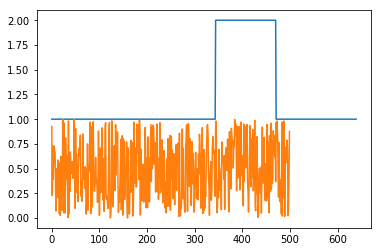

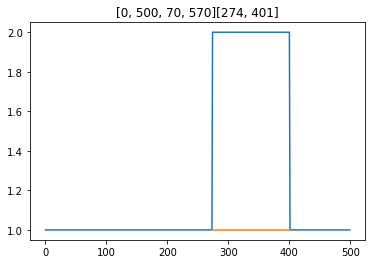

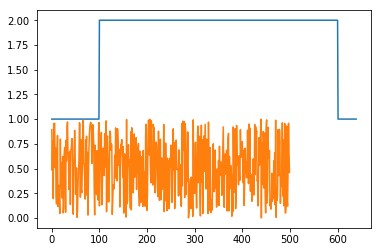

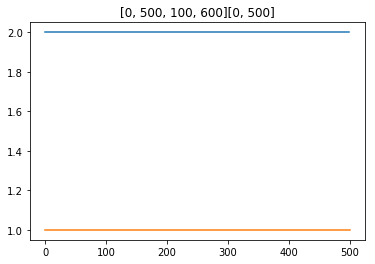

In [124]:
def resize_one_dims(start, length, orign_len, size, type="train"):
    start, length, orign_len, size = int(start), int(length), int(orign_len), int(size)    
    if type == "train":
        pick_start = np.random.randint
    else:
        pick_start = lambda o, u: np.mean([o, u])
    bbox = None
    if orign_len > size:
        if length > size:
            m = start + length / 2
            o_s = np.min([int(m - (size / 2)),orign_len-size])
            o_e = o_s + size       
            
            n_s = 0
            n_e = size
            bbox = [0,size]
        else:
            s = np.min([start,orign_len-size])
            o_s = int(pick_start(0, s))
            o_e = size + o_s
            n_s = 0
            n_e = size
    else:
        o_s = 0
        o_e = orign_len
        n_s = int(pick_start(0, size - orign_len))
        n_e = n_s + orign_len
    if bbox is None:
        bbox = [start - o_s + n_s,
            start + length -o_s + n_s
           ]
    return [n_s, n_e, o_s, o_e], bbox
    

def test_fn(fn, start, length, orign_len, size , **kwags):
    plt.figure()
    or_img = np.ones(orign_len)
    or_img[start:start+length] = 2
    n_img = np.random.rand(size)
    plt.plot(or_img)
    plt.plot(n_img)
    plt.figure()
    x, bbox = fn(start, length, orign_len, size, **kwags)
    print(x)
    n_img[x[0]:x[1]] = or_img[x[2]:x[3]]
    plt.plot(n_img)
    plt.plot([bbox[0],bbox[1]],[1,1])
    plt.title(str(x) + str(bbox))
    
start, length, orign_len, size = 50,550,650,500
test_fn(resize_one_dims, start, length, orign_len, size)
    
start, length, orign_len, size = 50,151,651,501
test_fn(resize_one_dims, start, length, orign_len, size)
    
start, length, orign_len, size = 50,150,400,500
test_fn(resize_one_dims, start, length, orign_len, size)

start, length, orign_len, size =344, 127, 640, 500
test_fn(resize_one_dims, start, length, orign_len, size, type = 'valid')
start, length, orign_len, size =100, 501, 640, 500
test_fn(resize_one_dims, start, length, orign_len, size, type = 'valid')

50 150 600 500
50 150 600 500
[0, 500, 12, 512]


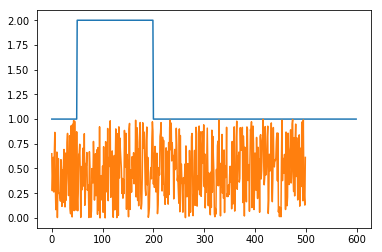

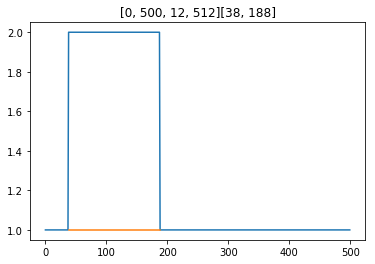

In [112]:

def test_fn(fn, start, length, orign_len, size , **kwags):
    plt.figure()
    or_img = np.ones(orign_len)
    or_img[start:start+length] = 2
    n_img = np.random.rand(size)
    plt.plot(or_img)
    plt.plot(n_img)
    plt.figure()
    x, bbox = fn(start, length, orign_len, size, **kwags)
    print(x)
    n_img[x[0]:x[1]] = or_img[x[2]:x[3]]
    plt.plot(n_img)
    plt.plot([bbox[0],bbox[1]],[1,1])
    plt.title(str(x) + str(bbox))
    
start, length, orign_len, size = 50,150,600,500
test_fn(resize_one_dims, start, length, orign_len, size )

In [58]:
from pathlib import Path
import cv2
size = 500
f = Path( '/home/tako/devtools/furry-geras/coco/val2017/000000050638.jpg')
data_dct = {'filename': '/home/tako/devtools/furry-geras/coco/val2017/000000050638.jpg', 'bbox': [344.43, 65.35, 127.94, 316.04999999999995], 'height': 393, 'width': 640}

(393, 640, 3)
(393, 640, 3)
{'filename': '/home/tako/devtools/furry-geras/coco/val2017/000000050638.jpg', 'bbox': [344.43, 65.35, 127.94, 316.04999999999995], 'height': 393, 'width': 640}
(500, 500, 3)


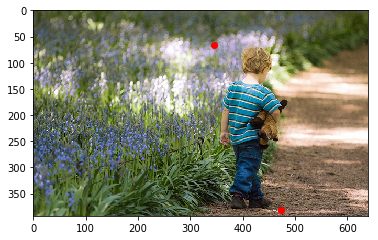

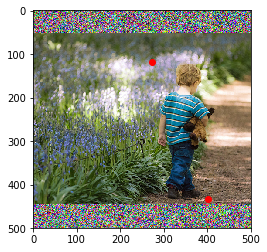

In [142]:
bbox = data_dct['bbox']
img = cv2.imread(str(f))
def plot_im(img,bbox):            
    plt.figure()
    print(img.shape)
    _img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    plt.imshow(_img)            
    plt.plot(bbox[0],bbox[1],'ro')
    plt.plot(bbox[0]+bbox[2],bbox[1]+bbox[3],'ro')
    
plot_im(img,bbox)
print(img.shape)

def make_crop_sizes(dct):
    print(dct)
    x,y,w,h = dct['bbox']
    x, x_bbox = resize_one_dims(x, w, data_dct["width"], size, type="eval")
    y, y_bbox = resize_one_dims(y, h, data_dct["height"], size, type="eval")

    bbox = [x_bbox[0],y_bbox[0],x_bbox[1] - x_bbox[0],y_bbox[1]- y_bbox[0],]
    
    return x,y, bbox


x,y, bbox = make_crop_sizes(data_dct)

n_img = np.random.randint(0,255,size =(size,size,3)).astype(np.uint8)
# print(n_img)
n_img[y[0]:y[1],x[0]:x[1],:] = img[y[2]:y[3],x[2]:x[3],:]
plot_im(n_img,bbox)

In [75]:
672 - 172,

(500,)